In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import trim_mean
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 7.8 MB/s eta 0:00:00


In [4]:
df = pd.read_csv('Math-Students.csv')

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.shape

(399, 33)

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,16.709273,2.761905,2.536341,1.443609,2.035088,0.330827,3.954887,3.233083,3.097744,1.476190,2.288221,3.558897,5.651629,10.879699,10.676692,10.380952
std,1.278225,1.096340,1.092716,0.695429,0.835020,0.740655,0.898335,0.994107,1.113178,0.887552,1.281737,1.384013,7.983113,3.315195,3.760845,4.571073
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.500000,8.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.500000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.500000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
cat_cols = []
for col in df.columns[1:]:
    if df[col].dtypes == "object":
        cat_cols.append(col)

for i in cat_cols:
    print(df[i].value_counts())
    print("-"*30)

sex
F    208
M    191
Name: count, dtype: int64
------------------------------
address
U    311
R     88
Name: count, dtype: int64
------------------------------
famsize
GT3    285
LE3    114
Name: count, dtype: int64
------------------------------
Pstatus
T    358
A     41
Name: count, dtype: int64
------------------------------
Mjob
other       141
services    103
teacher      62
at_home      59
health       34
Name: count, dtype: int64
------------------------------
Fjob
other       218
services    113
teacher      29
at_home      21
health       18
Name: count, dtype: int64
------------------------------
reason
course        147
home          109
reputation    107
other          36
Name: count, dtype: int64
------------------------------
guardian
mother    277
father     90
other      32
Name: count, dtype: int64
------------------------------
schoolsup
no     348
yes     51
Name: count, dtype: int64
------------------------------
famsup
yes    242
no     157
Name: count, dtype: in

In [11]:
df.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [12]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [21]:
df[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,399.000000,399.000000,399.000000
mean,10.879699,10.676692,10.380952
std,3.315195,3.760845,4.571073
min,3.000000,0.000000,0.000000
25%,8.000000,8.500000,8.000000
50%,11.000000,11.000000,11.000000
75%,13.000000,13.000000,13.500000
max,19.000000,19.000000,20.000000


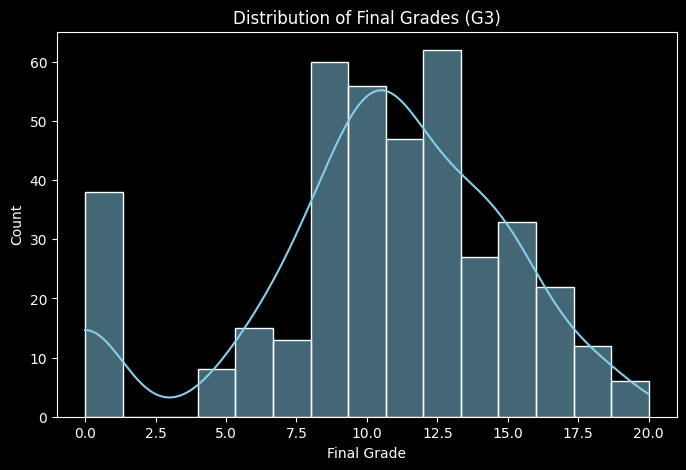

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

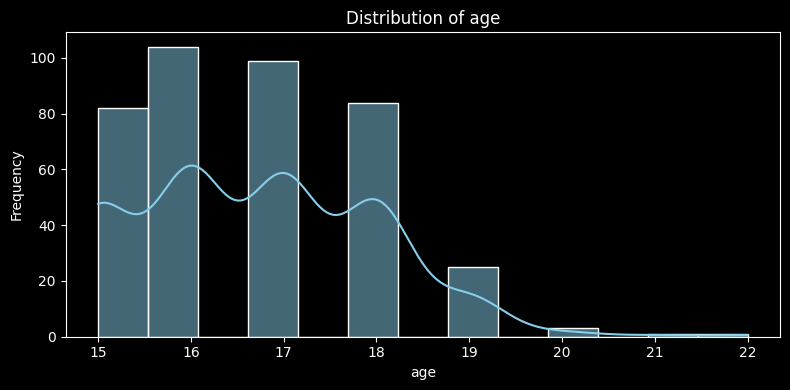

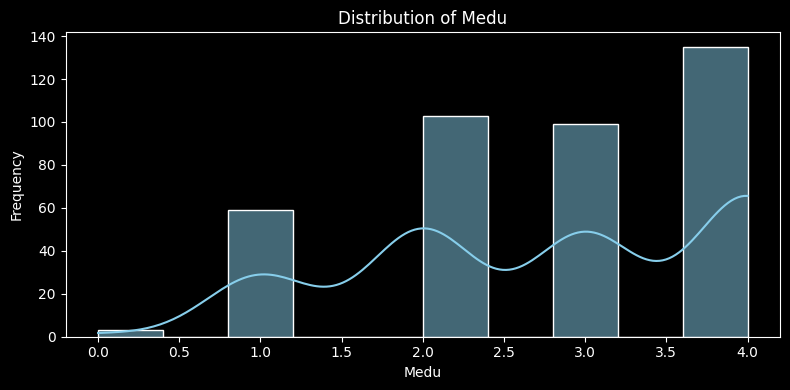

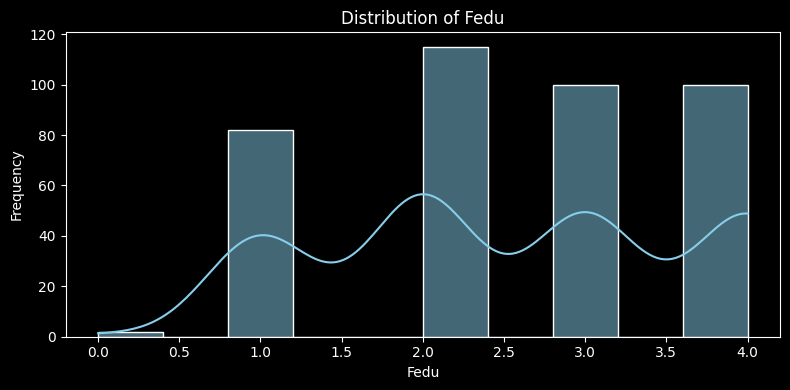

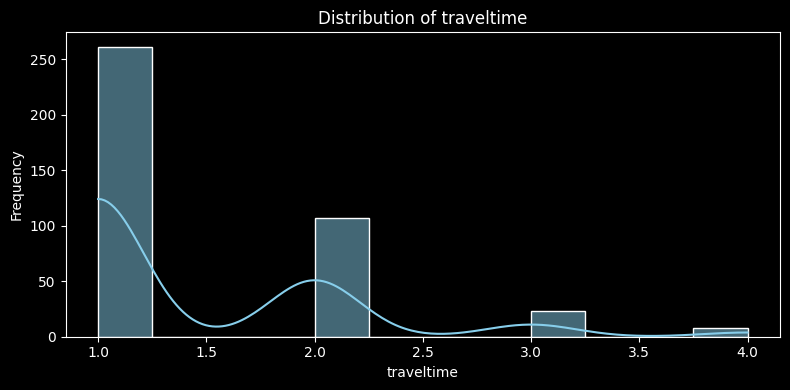

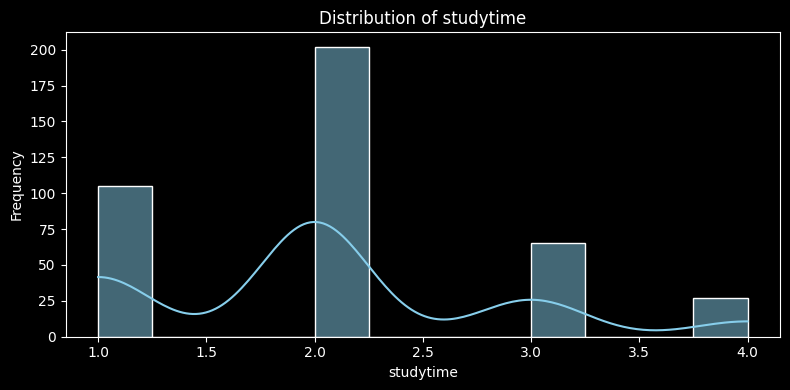

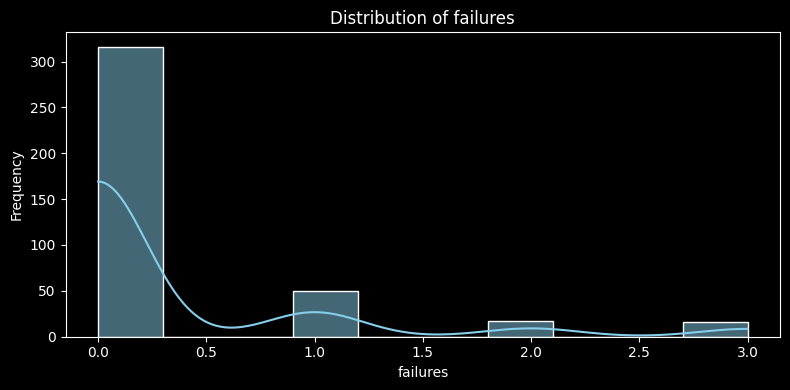

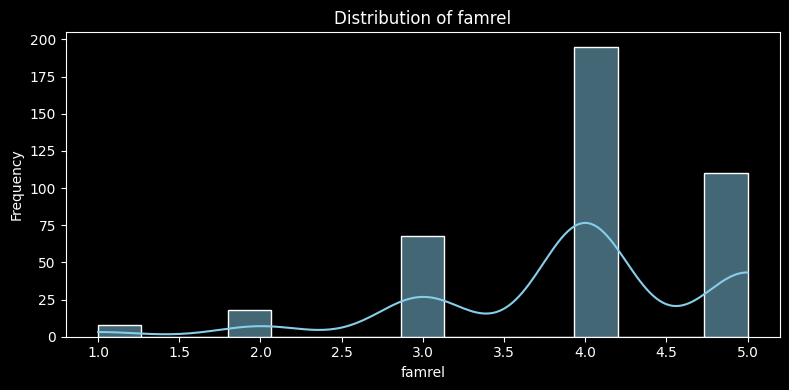

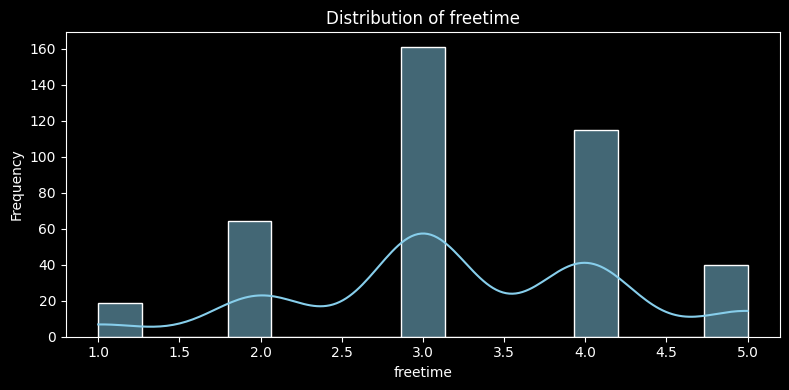

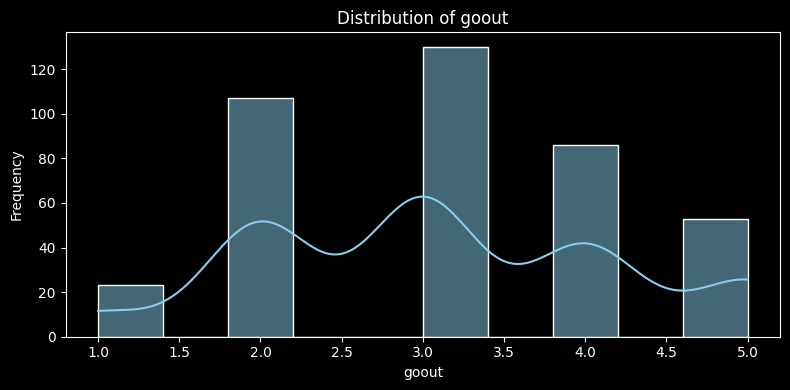

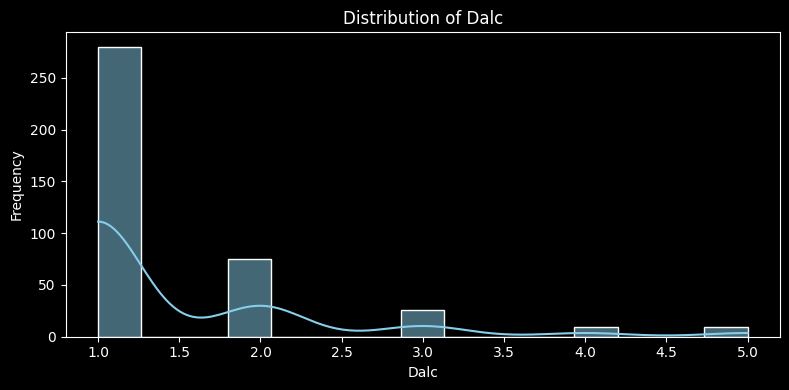

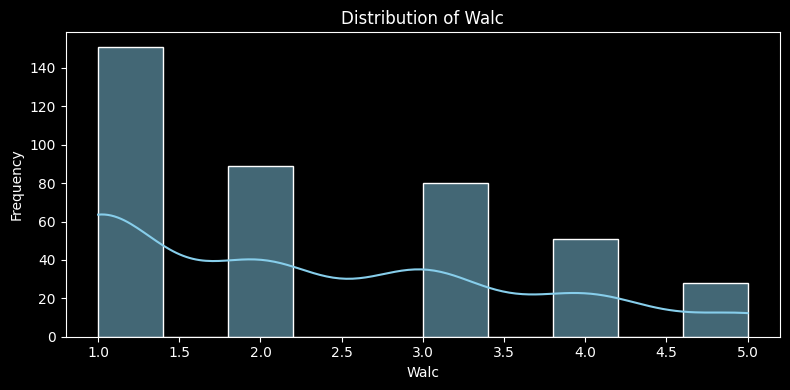

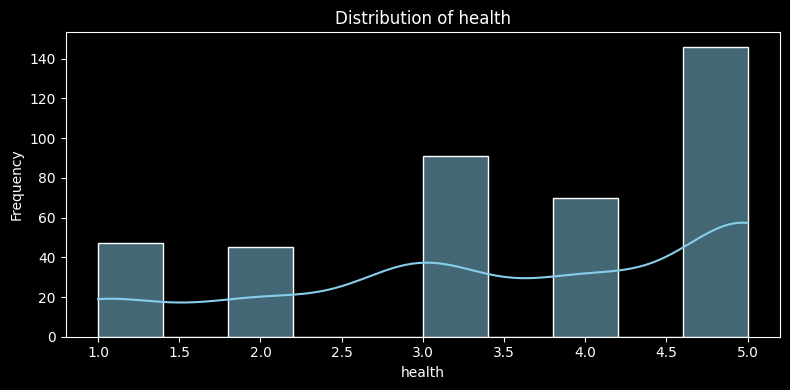

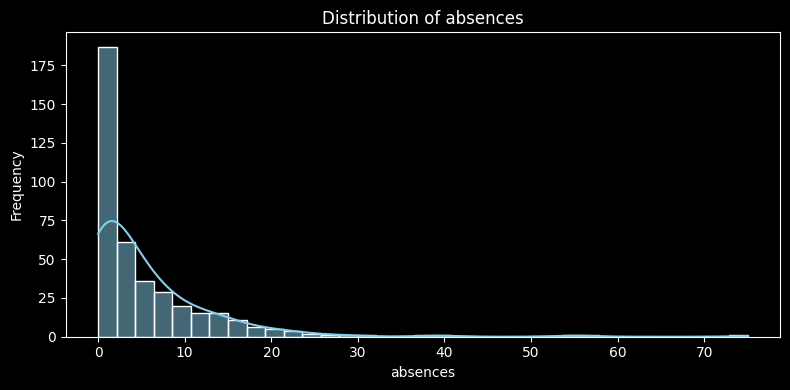

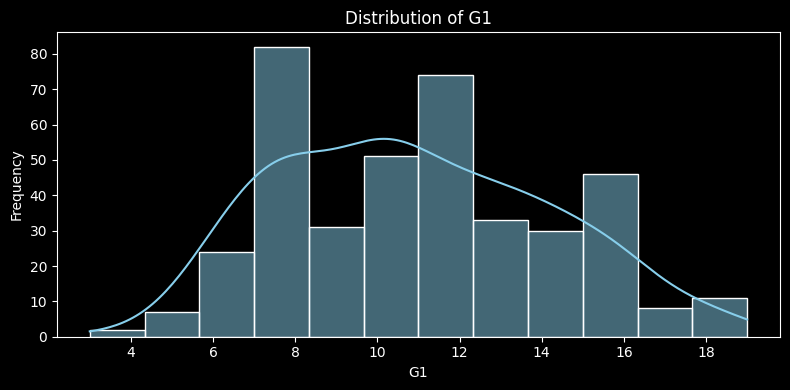

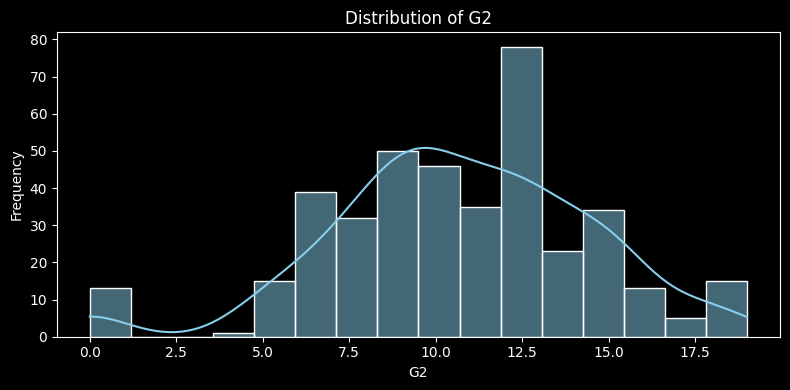

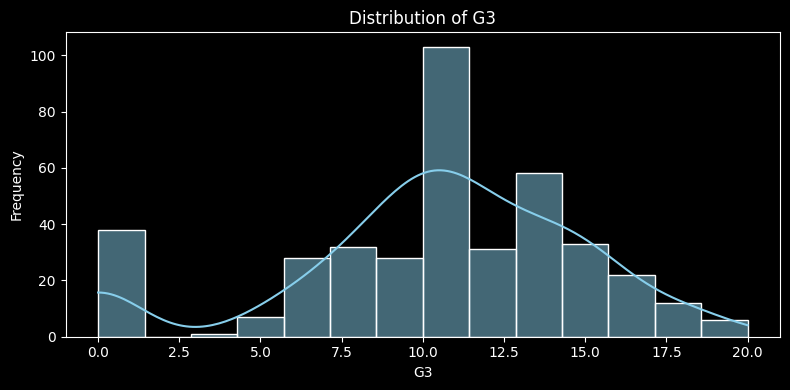

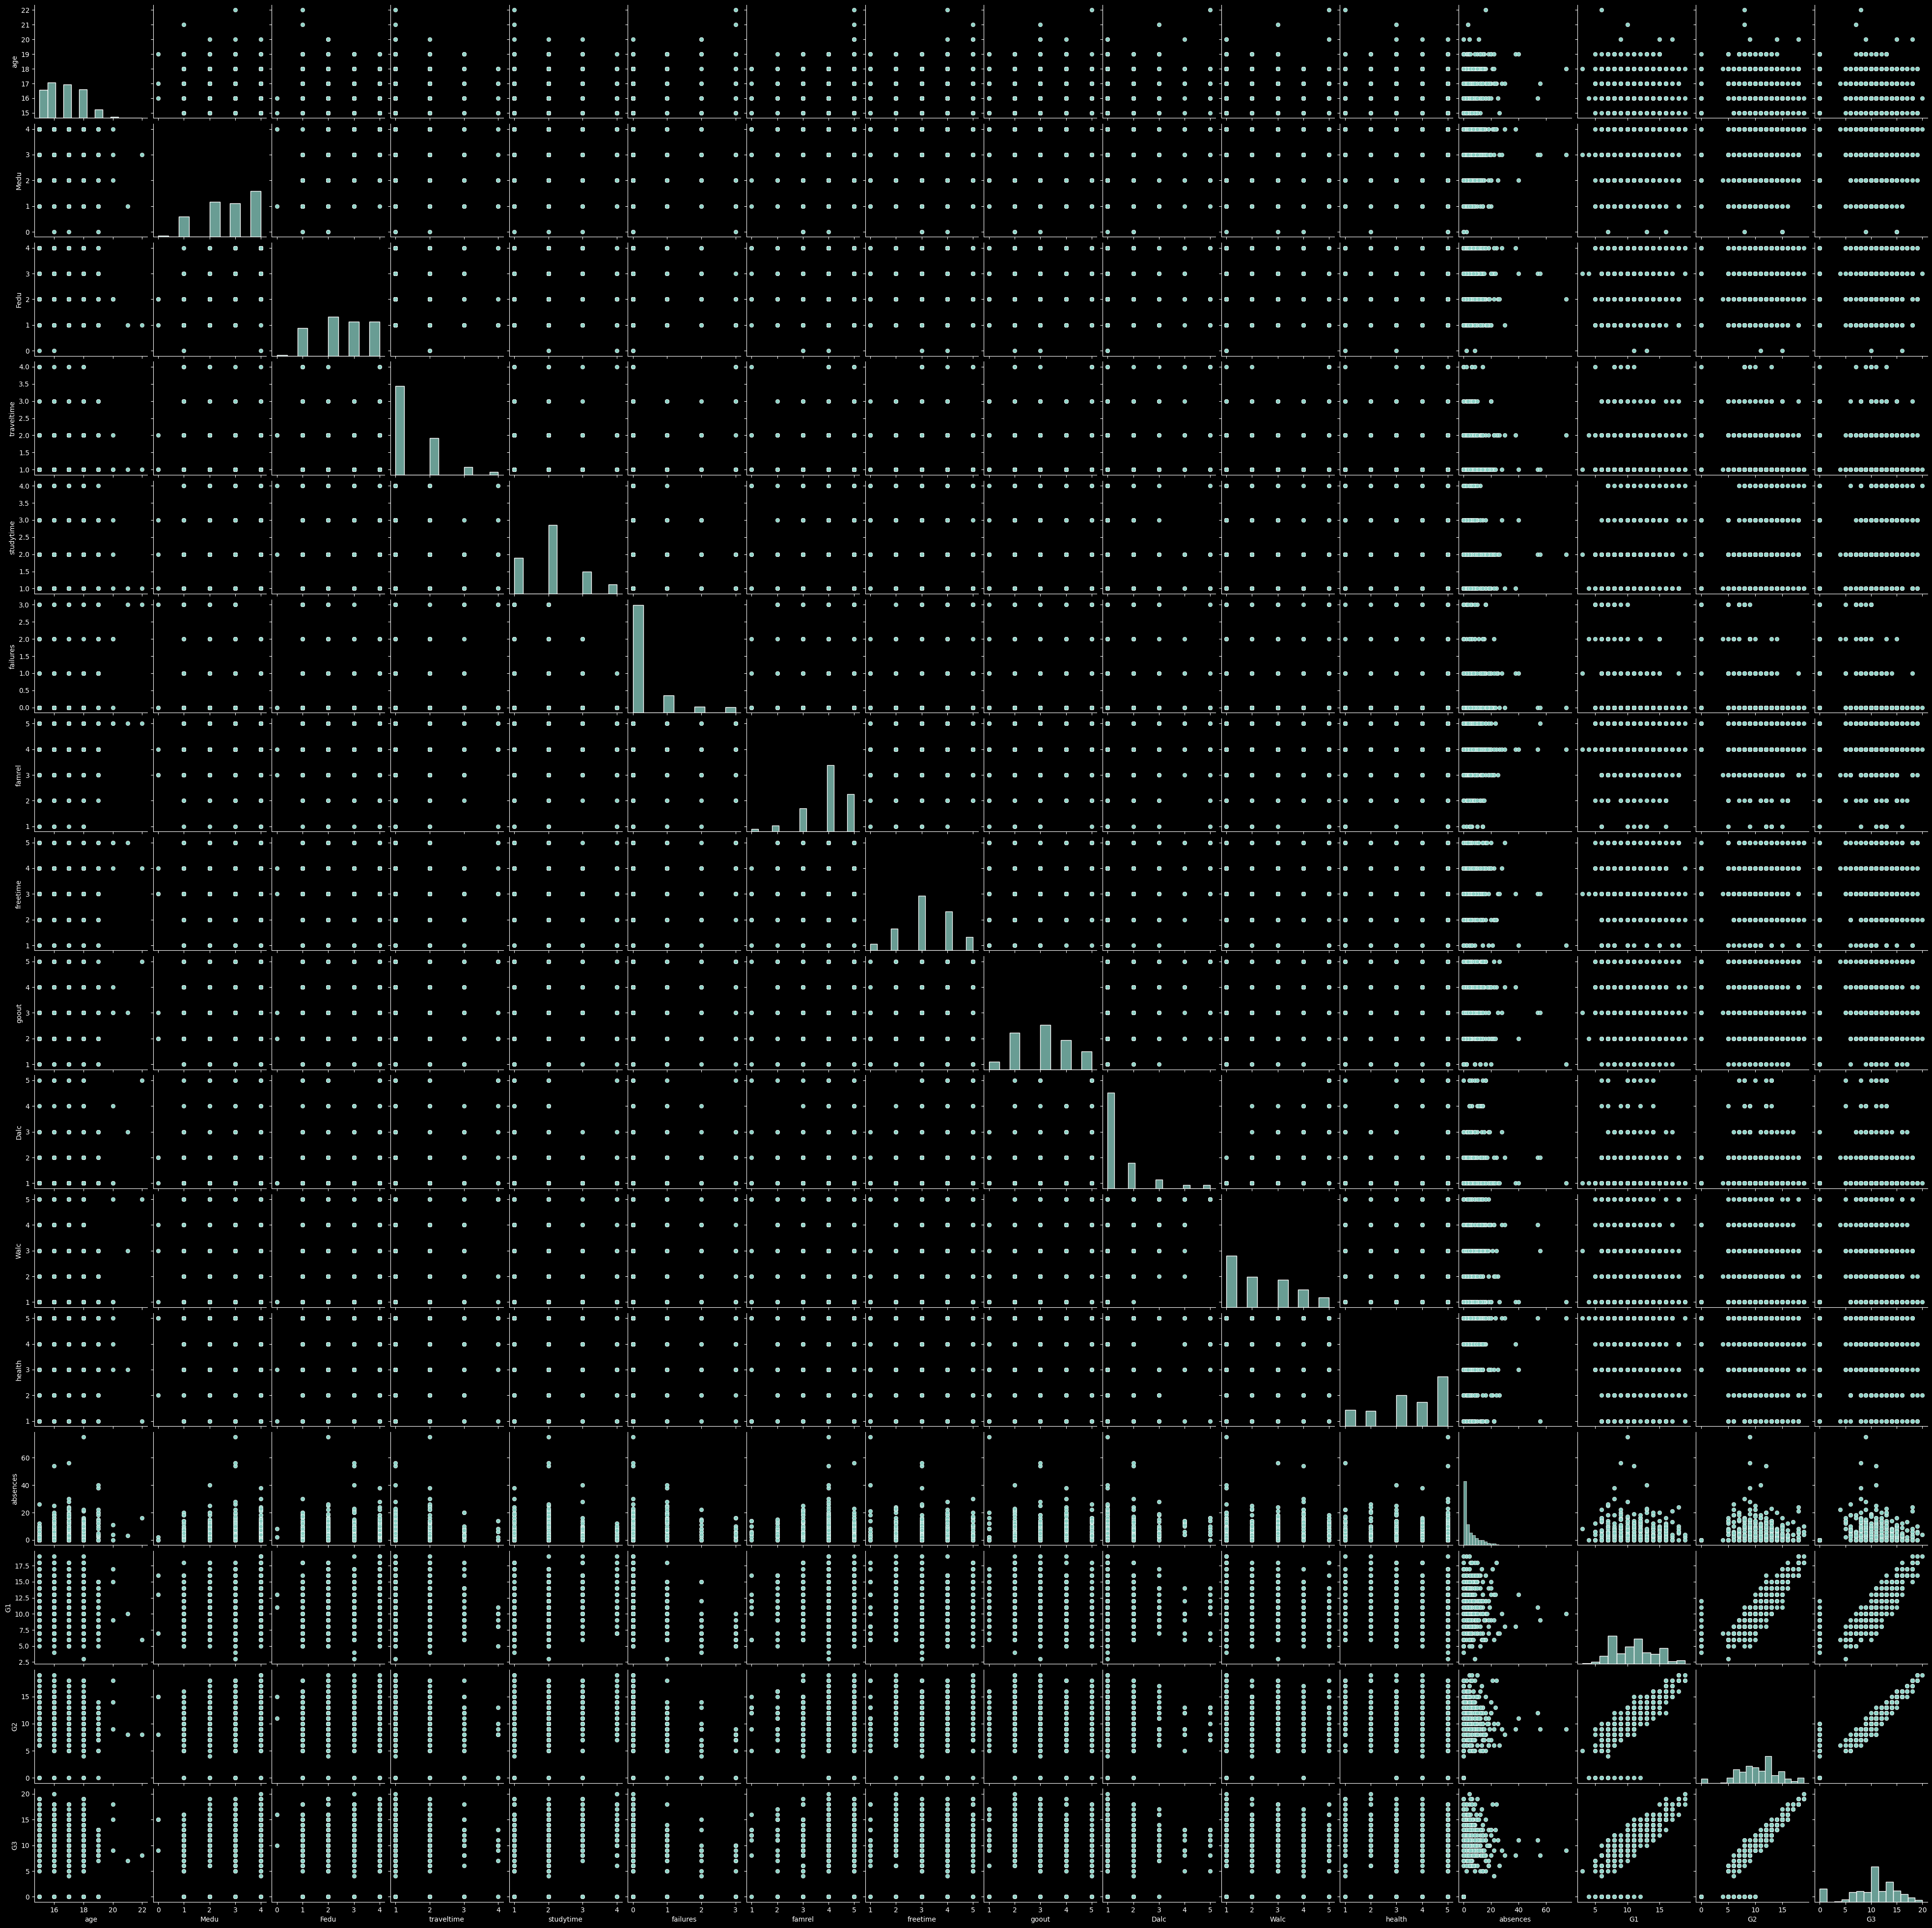

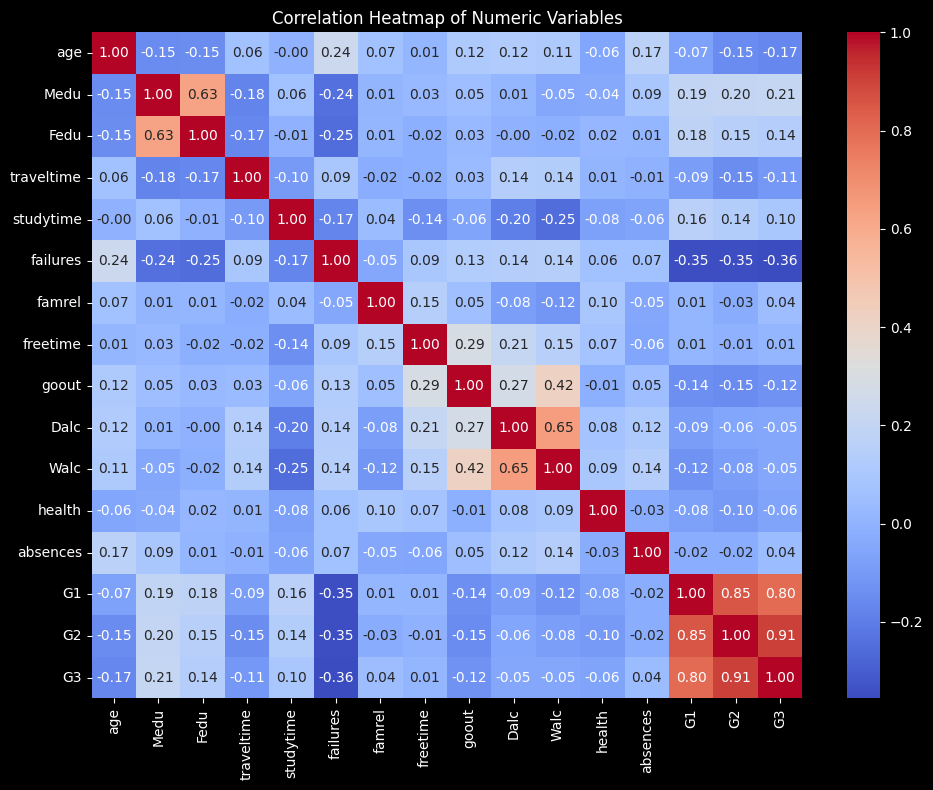

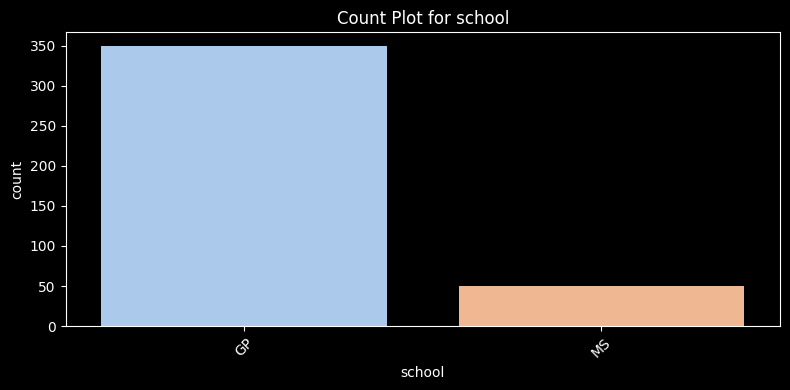

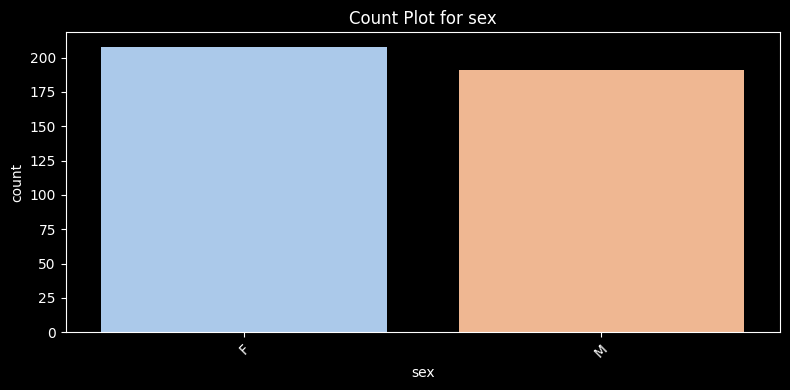

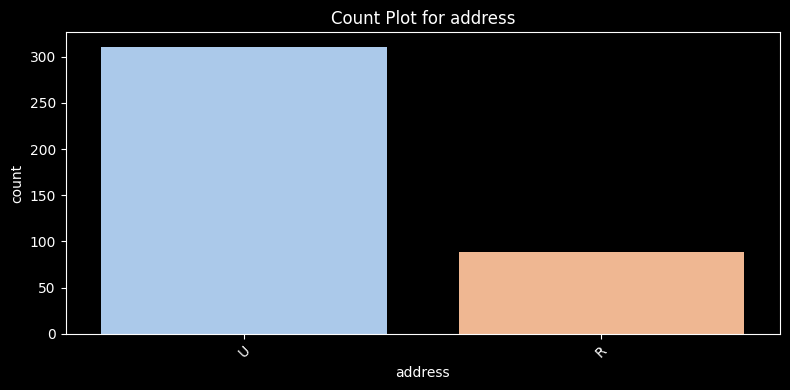

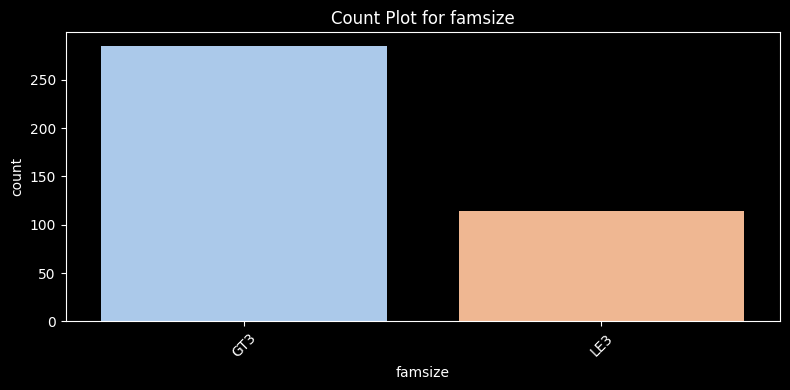

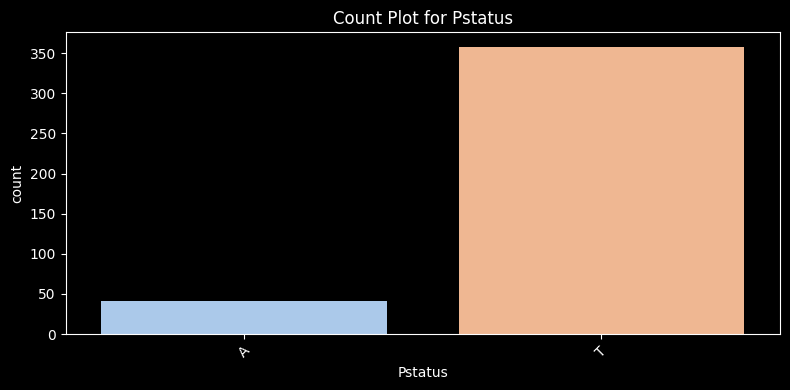

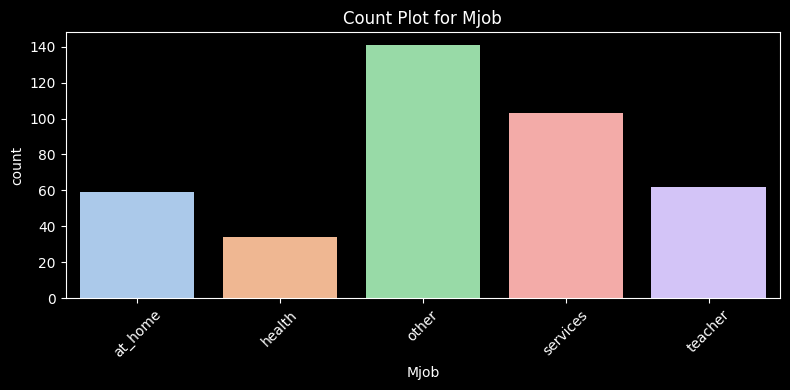

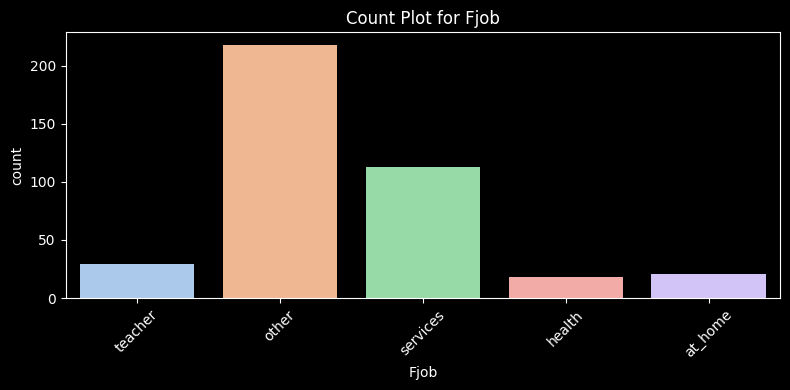

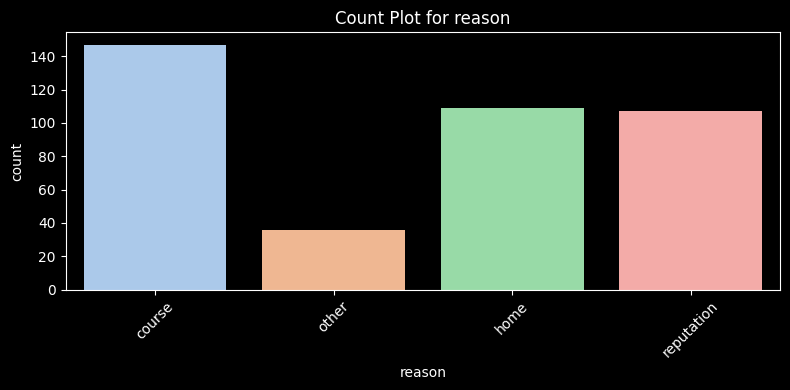

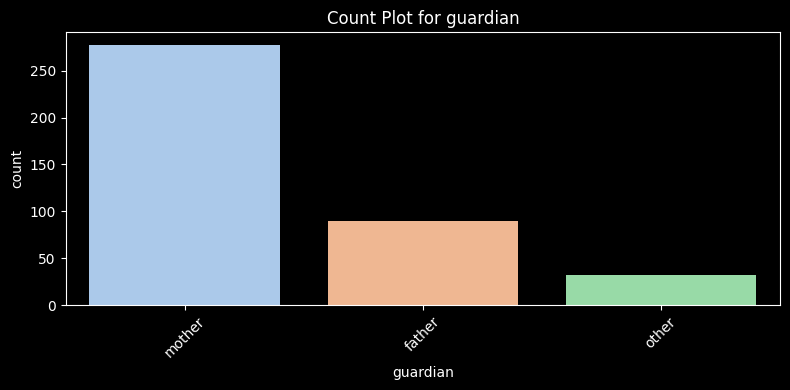

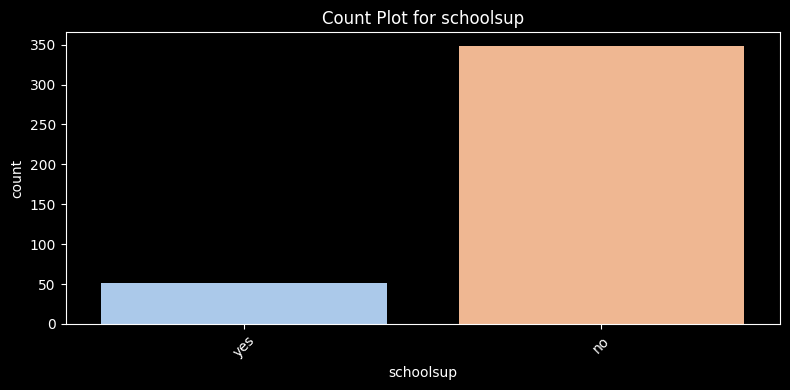

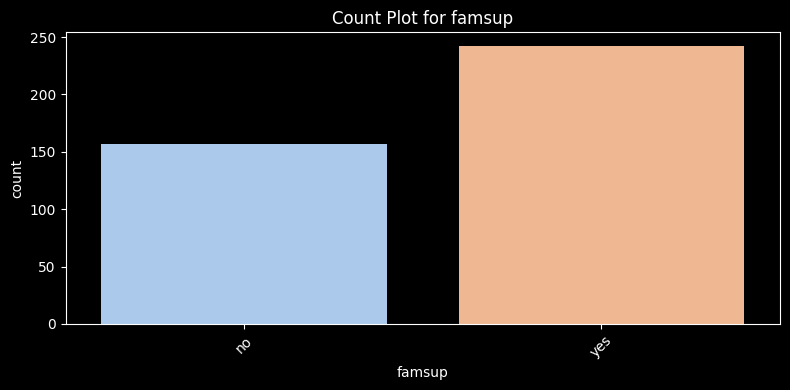

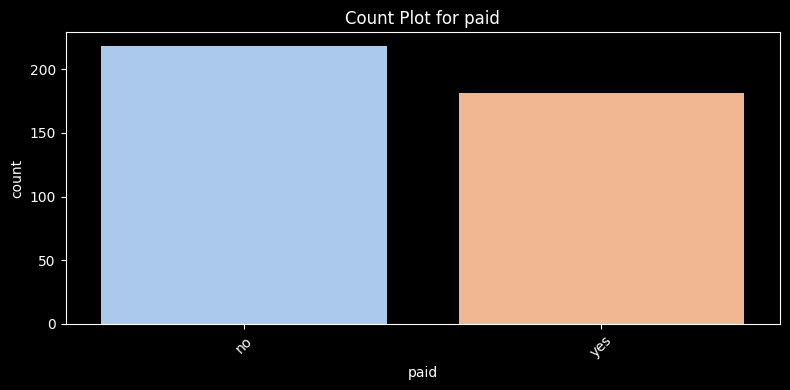

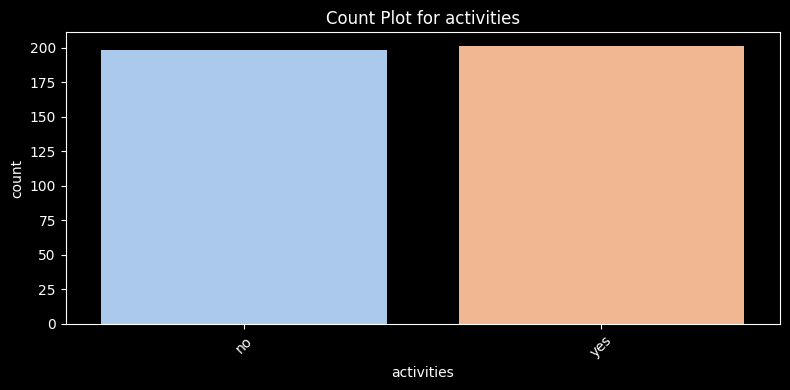

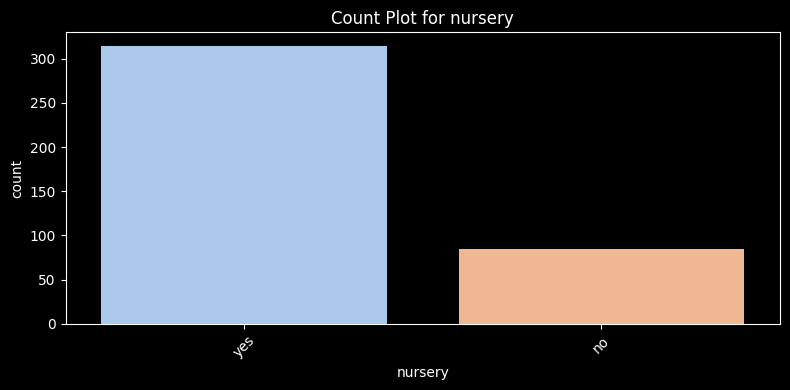

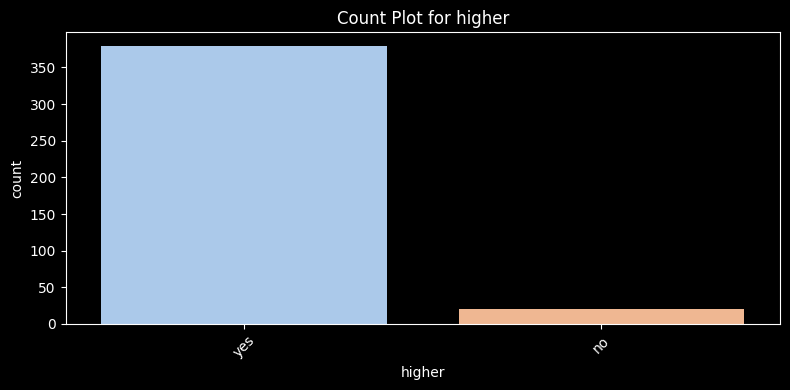

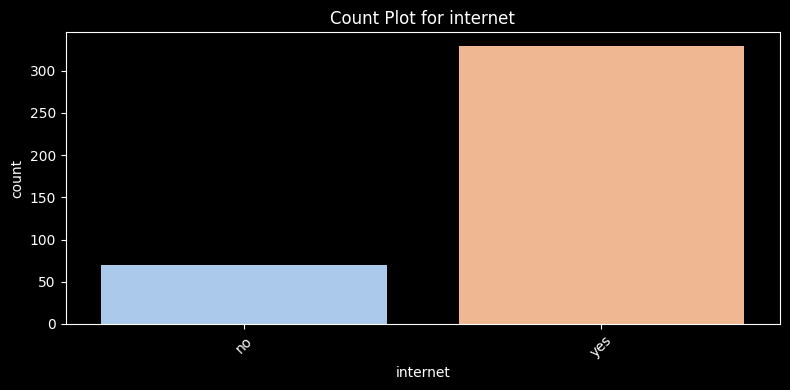

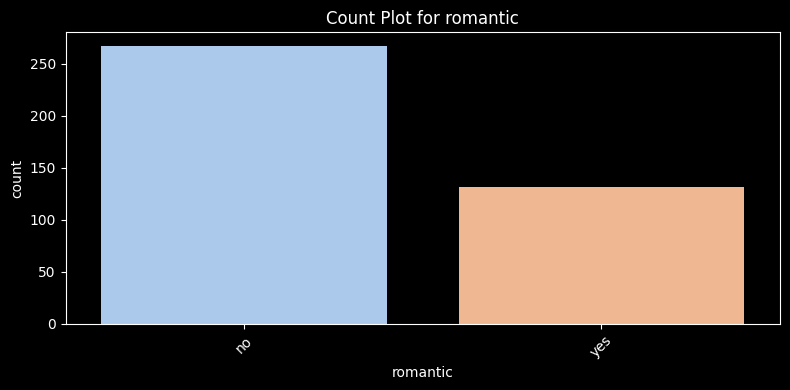

In [14]:
# Exploratory Data Analysis (EDA)
## Distribution of numerical features
numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime',
                   'studytime', 'failures', 'famrel', 'freetime', 'goout',
                   'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Pair Plot to inspect potential relationships
sns.pairplot(df[numeric_columns])
plt.show()

## Correlation Heatmap if four or more numeric columns exist
if len(numeric_columns) >= 4:
    numeric_df = df[numeric_columns]
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()

## Pie Chart (using count plot) for categorical variables
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus',
       'Mjob', 'Fjob', 'reason', 'guardian',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


<Axes: >

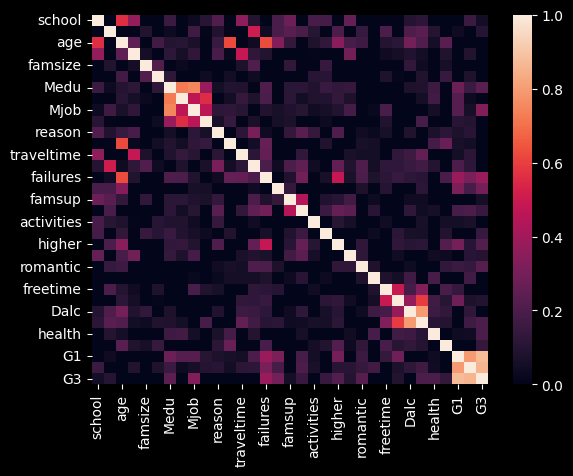

In [16]:
sns.heatmap(phik_overview)

R2 Score: 0.137
Mean Squared Error: 17.832


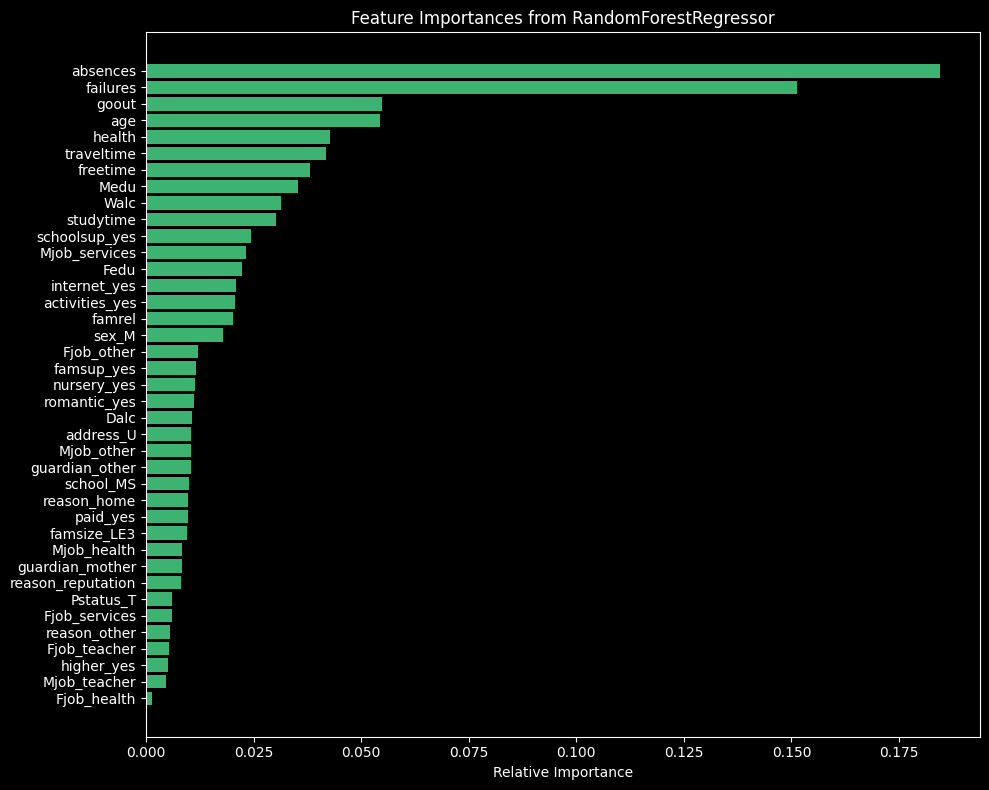

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загружаем данные (предположим, что df уже загружен)
X = df.drop(['G3', 'G2', 'G1'], axis=1)
y = df['G3']

# Преобразуем категориальные столбцы в числовые (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Теперь ошибки не будет!

# Предсказания и оценка
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2 Score: {r2:.3f}')
print(f'Mean Squared Error: {mse:.3f}')

# Визуализация важности признаков
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center', color='mediumseagreen')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances from RandomForestRegressor')
plt.tight_layout()
plt.show()

In [20]:
df[(df['G3'] > 16) & (df['age'] >= 18)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
260,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,21,17,18,18
265,GP,M,18,R,LE3,A,3,4,other,other,...,4,2,5,3,4,1,13,17,17,17
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,2,2,5,18,18,19
306,GP,M,20,U,GT3,A,3,2,services,other,...,5,5,3,1,1,5,0,17,18,18
338,GP,F,18,U,LE3,T,3,3,services,services,...,5,3,3,1,1,1,7,16,15,17
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19


In [19]:
df.groupby(['health'])['G3'].agg(['count','mean','median'])

,count,mean,median
health,,,
1,47,11.872340,13.0
2,45,10.222222,10.0
3,91,10.010989,10.0
4,70,9.928571,10.0
5,146,10.397260,11.0


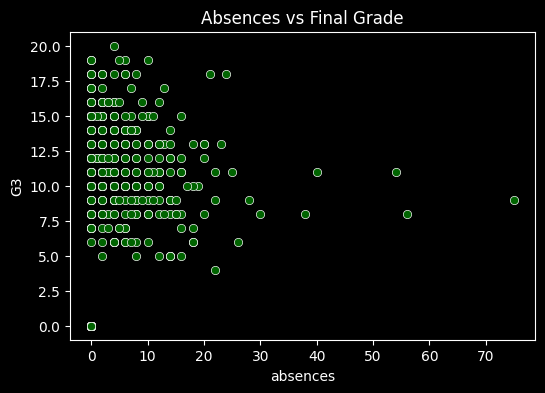

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='absences', y='G3', color='darkgreen')
plt.title('Absences vs Final Grade')
plt.show()

##Резюме
###Исследовательский анализ данных (EDA)
####Загрузка набора данных:

Загружается набор данных "Math-Students.csv", содержащий 399 записей и 33 столбца.
В столбцы входят: школа, пол, возраст, адрес, размер семьи, Pstatus, Medu, Fedu, Mjob, Fjob, причина, опекун, время в пути, время учебы, неудачи, schoolsup, famsup, интернет, романтика, famrel, свободное время, goout, Dalc, Walc, здоровье, отсутствие, G1, G2, G3 и др.
Общая информация:

####Отображает общую информацию о наборе данных.
Проверяет наличие пропущенных значений (ничего не найдено).
Перечисляет уникальные значения для категориальных столбцов.
Предоставляет описательную статистику для числовых столбцов (среднее, стандартное отклонение, минимум, максимум).
Распределение целевых оценок:

####Анализирует распределение итоговой оценки (G3).
Визуализация
Общая эстетика:

Задает эстетику визуализации с помощью графиков seaborn.

####Вывод:
на распределение итоговой оценки (G3) особое влияние оказывает отсутствие студентов и неудачи.